In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from CompressTree import CompressTree
from numpy.linalg import svd
from TreeDraw import draw_tree
from MatrixGenerator import generate_3d_matrix
from MatrixMultiplication import compmatrix_mul_vector, mul_compmatrix

from  timeit import default_timer as timer

In [6]:
from matplotlib.pyplot import spy
def measure_algorithm():
    results = []
    for k in range(2, 5):
        X = generate_3d_matrix(k)
        X_cpy = deepcopy(X)
        U, Sigma, V = svd(X_cpy)
        for s in [len(Sigma)//2]:
            root = CompressTree(X_cpy, 0, len(X_cpy), 0, len(X_cpy[0]))
            root.create_tree(2, Sigma[s])
            draw_tree(root, f'macierz po kompresji\n dla sigmy {s} k {k}')

            # czas
            st = timer()
            result = mul_compmatrix(root, root)
            end = timer()

            #błąd
            N = np.zeros_like(X)
            result.decompress(N)
            result_true = X_cpy@X_cpy
            err = np.sum(np.square(N - result_true))
            results.append([k, s, end-st, err])
            print([k, s, end-st, err])
    df = pd.DataFrame(results, columns=["k", "s", "time", "error"])
    return df


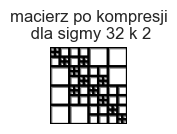

[2, 32, 1.4366265999997267, 168.2667121351338]


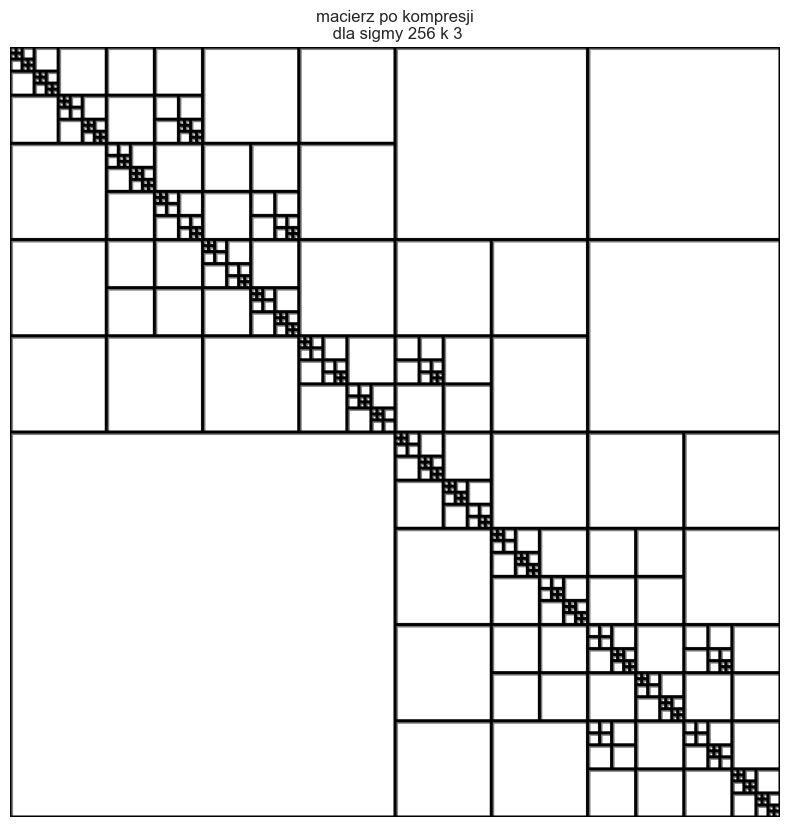

[3, 256, 94.76285619999544, 2058.513894775376]


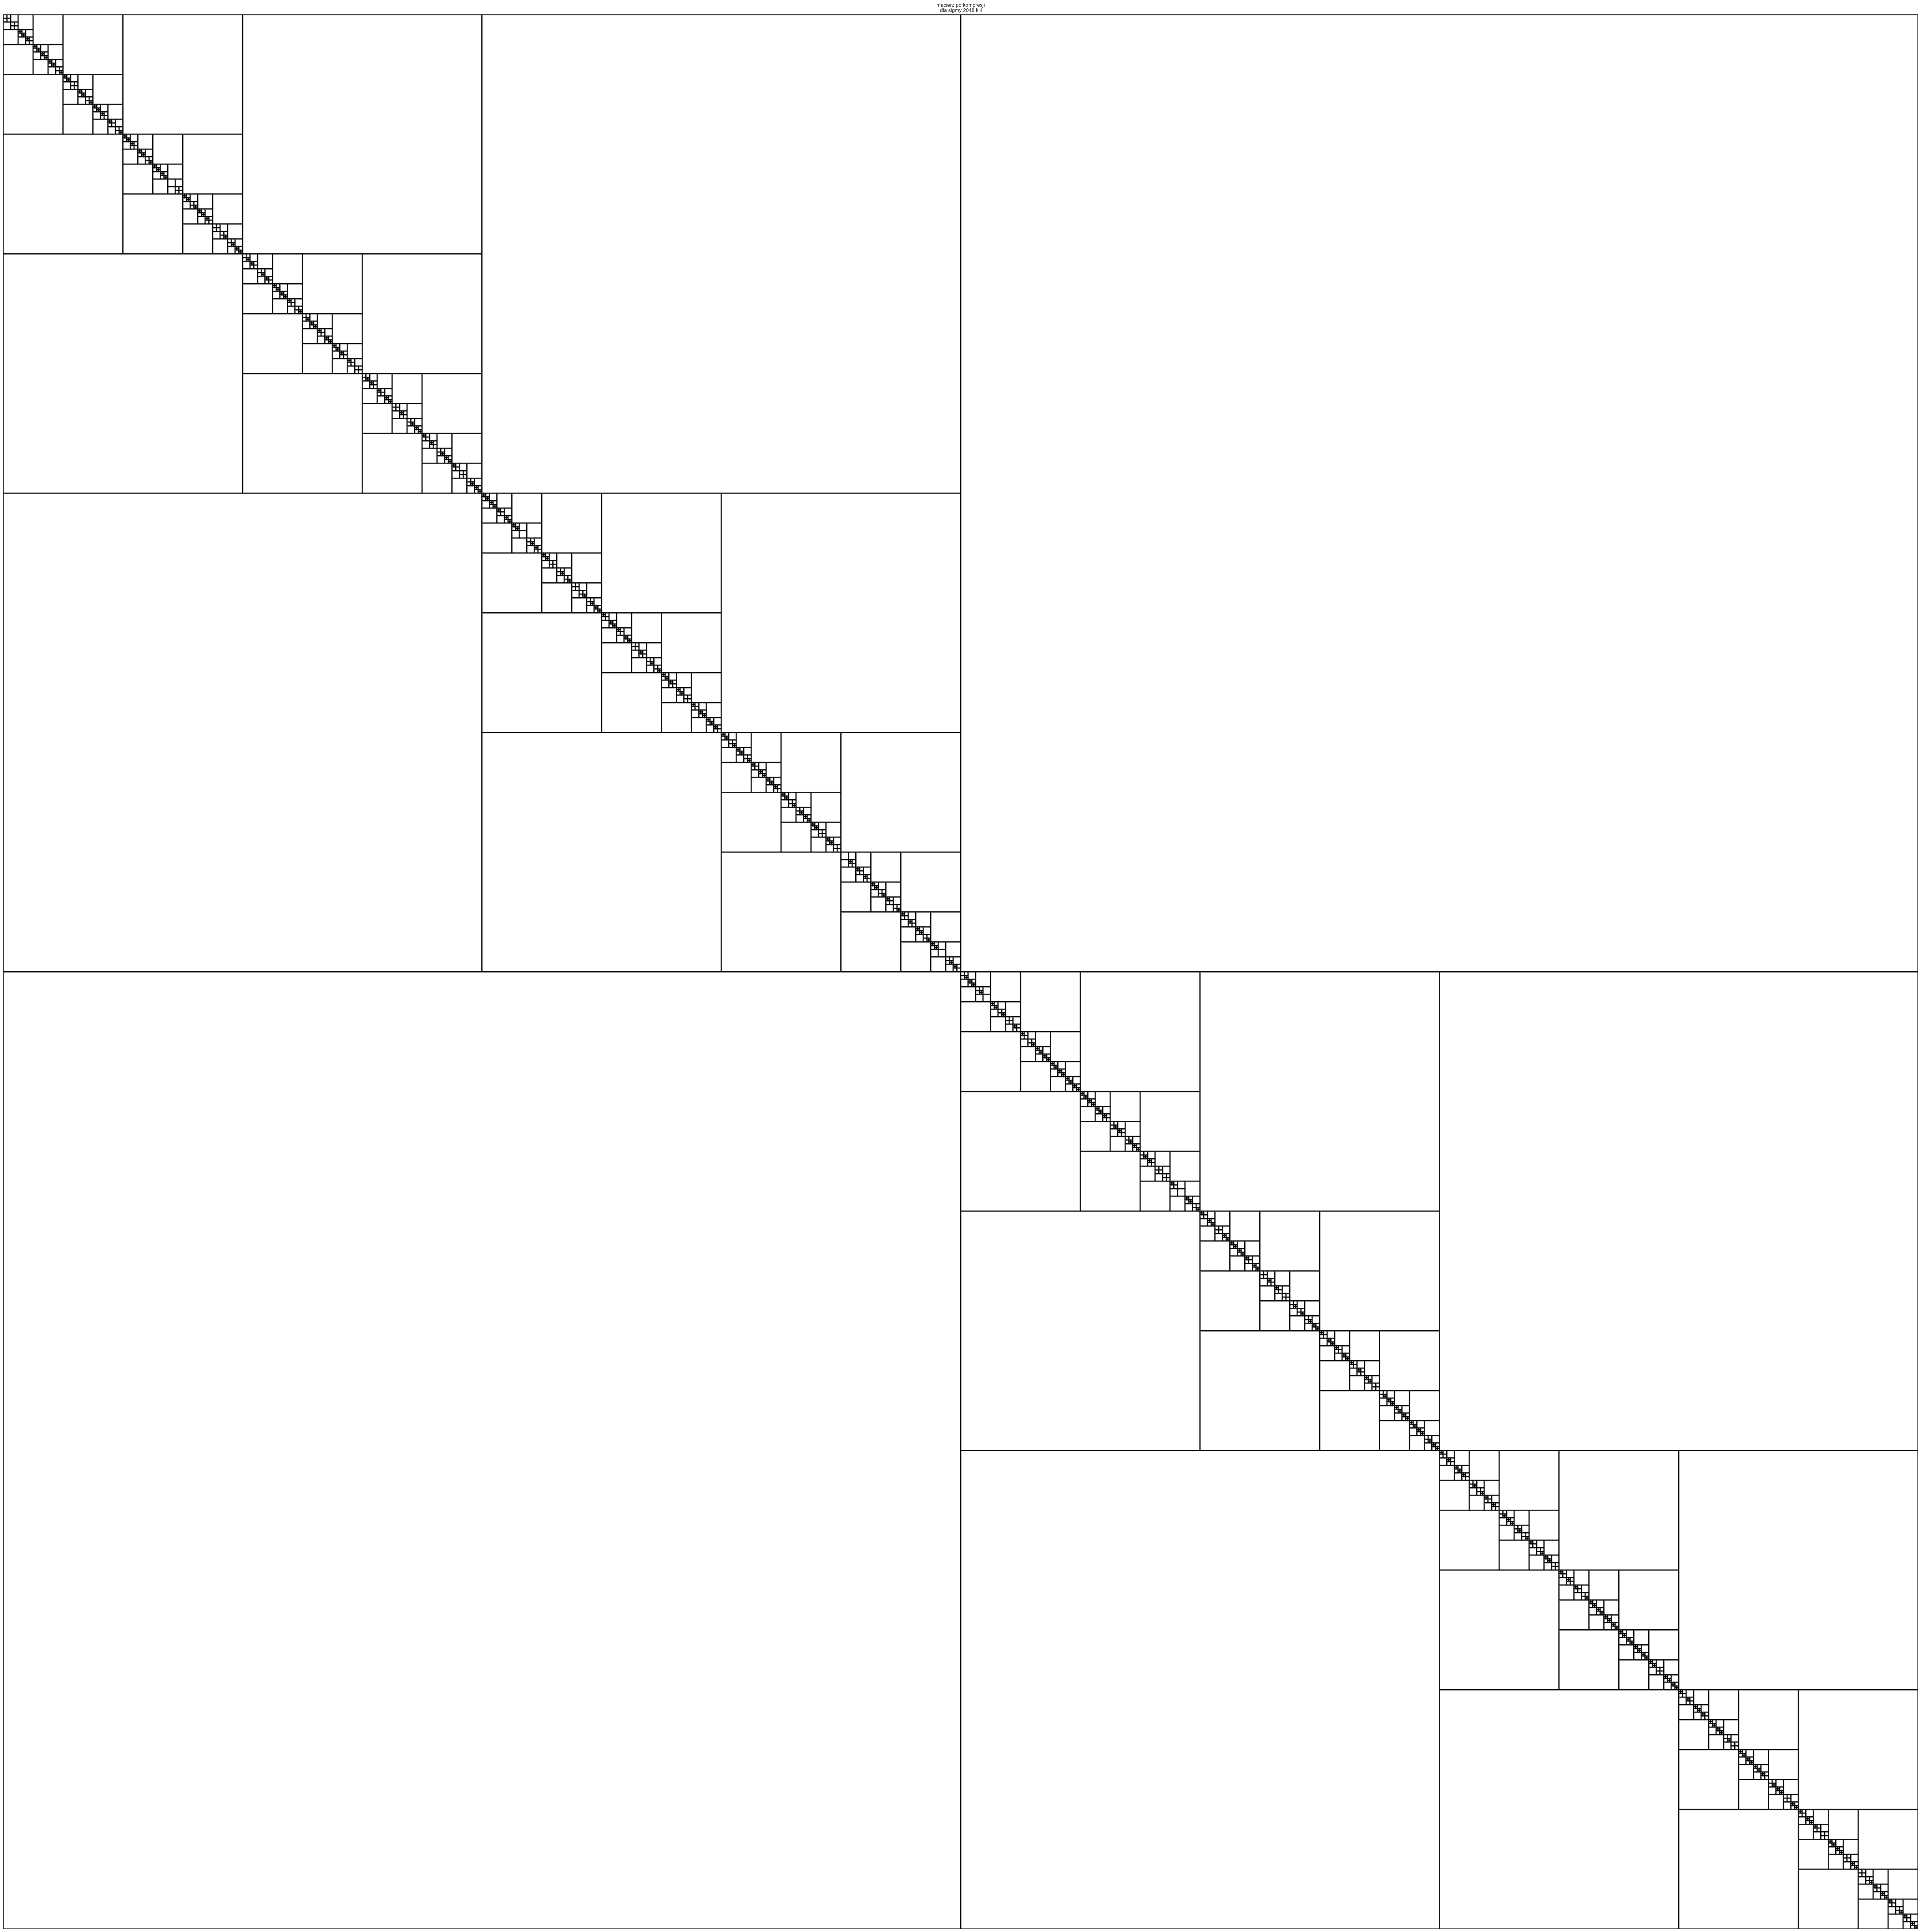

[4, 2048, 7836.314434200001, 21588.409335713935]


In [7]:
df = measure_algorithm()

In [8]:
df

,k,s,time,error
0,2,32,1.436627,168.266712
1,3,256,94.762856,2058.513895
2,4,2048,7836.314434,21588.409336


Exponent k is approximately: 15.34709258036232
contant a is approximately: 4.510673846391196e-06


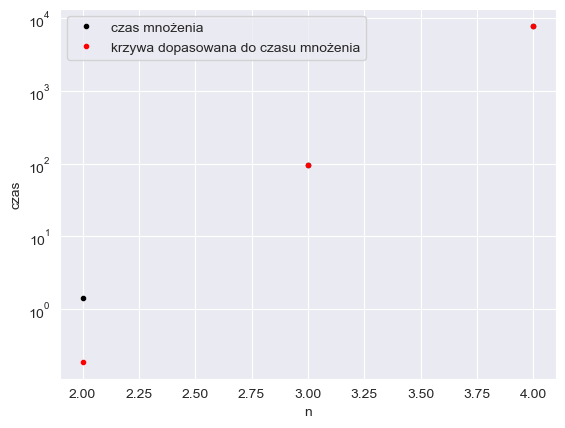

In [16]:
from math import sqrt
from scipy.optimize import curve_fit

def fit_curve(name1, name2, dataframe):
    x_data = dataframe[name1]
    y_data = dataframe[name2]
    def power_law(x, a, k):
        return a*x**k

    params, covariance = curve_fit(power_law, x_data, y_data, p0=[1.0, 1.0])
    a, k = params
    print(f"Exponent k is approximately: {k}")
    print(f"contant a is approximately: {a}")
    return a, k

def plot_with_fit(a, k, data_frame, name1, name2, name):
    powers = data_frame[name1]
    time = data_frame[name2]

    time_spprox = [a * i ** k for i in powers]
    plt.plot(powers, time, ".", label = f"czas mnożenia", color="black", )
    plt.plot(powers, time_spprox, ".", label = f"krzywa dopasowana do czasu mnożenia", color="red")
    plt.xlabel("n")
    plt.ylabel("czas")
    plt.legend()
    plt.semilogy()
    plt.show()

a, k = fit_curve("k", "time", df)
plot_with_fit(a, k , df, "k", "time", "Bineta")